### 목표 : 미니배치 기반 기계학습 진행 실습
- 확률적 경사하강법 기반의 알고리즘 적용 모델
- 데이터의 처음부터 끝까지(에포크) 학습 후 가중치(W)와 절편(b) 업데이트 하는 방식에서 에포크를 미니배치 크기만큼 나누어 
    학습 후 가중치(W)와 절편(B) 업데이트 진행
- 장점
    - 온라인 학습(점진적 학습) 가능 = partial fit(): 기존 모델에 추가로 1에포크 학습
    - 기존의 다른 모델 대비 속도가 빠름 = 랜덤으로 한 개의 데이터 추출 후 학습 진행
    - 조기 학습 중단 설정 가능
- 단점
    - 전체 학습보다 정확도는 떨어질 수 있음

1. 모듈 로딩, 데이터 준비
<hr>

In [1]:
#module loading
import pandas as pd
import matplotlib.pyplot as plt

data = '../data/fish.csv'
fishDF = pd.read_csv(data)
fishDF

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


2. 데이터 전처리: 학습을 위한 가공
<hr>

In [2]:
# 2 - 1. feature / target 분리

featureDF = fishDF[fishDF.columns[1:]]
targetDF = fishDF['Species']

print(f'feature = [{featureDF}]\ntarget = [{targetDF}]')

#2 - 2. 학습 / 테스트용 데이터셋 분리
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(featureDF, targetDF, stratify=targetDF, random_state=41)

print(f'[train data] ; {xtrain.shape}, {ytrain.shape}')
print(f'[test data] ; {xtest.shape}, {ytest.shape}')

feature = [     Weight  Length  Diagonal   Height   Width
0     242.0    25.4      30.0  11.5200  4.0200
1     290.0    26.3      31.2  12.4800  4.3056
2     340.0    26.5      31.1  12.3778  4.6961
3     363.0    29.0      33.5  12.7300  4.4555
4     430.0    29.0      34.0  12.4440  5.1340
..      ...     ...       ...      ...     ...
154    12.2    12.2      13.4   2.0904  1.3936
155    13.4    12.4      13.5   2.4300  1.2690
156    12.2    13.0      13.8   2.2770  1.2558
157    19.7    14.3      15.2   2.8728  2.0672
158    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 5 columns]]
target = [0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object]
[train data] ; (119, 5), (119,)
[test data] ; (40, 5), (40,)


In [3]:
# 2 - 3. feature scale

from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

#훈련데이터 스케일링
sdscaler.fit(xtrain)
scaled_xtrain = sdscaler.transform(xtrain)

#테스트데이터 스케일링
sdscaler.fit(xtest)
scaled_xtest = sdscaler.transform(xtest)

3. 학습 진행
<hr>
- 학습 방법: 확률적 경사하강법(SGD) 기반 분류

In [14]:
#모델 인스턴스 생성
from sklearn.linear_model import SGDClassifier
model1 = SGDClassifier(random_state=41, verbose=0, loss= 'log_loss', alpha= 0.01)

model1.fit(scaled_xtrain, ytrain)


SGDClassifier(alpha=0.01, loss='log_loss', random_state=41)

In [15]:
train_score1 = model1.score(scaled_xtrain, ytrain)
test_score1 = model1.score(scaled_xtest, ytest)

print(f'[기본 SGD 학습점수] : {train_score1}\n[테스트 점수]:{test_score1}')

[기본 SGD 학습점수] : 0.7983193277310925
[테스트 점수]:0.775


In [6]:
#학습 후 설정된 파라미터(모델 파라미터) 
print(f'n_iter : {model1.n_iter_}')

n_iter : 197


* 1에포크씩 점진적으로 학습 진행: partial_fit()



In [7]:
#모델 인스턴스 생성

model2 = SGDClassifier(loss='log_loss')
model2.partial_fit(scaled_xtrain, ytrain,ytrain.unique() )

SGDClassifier(loss='log_loss')

In [8]:
train_score2 = model2.score(scaled_xtrain, ytrain)
test_score2 = model2.score(scaled_xtest, ytest)

In [9]:
print(f'[기본 SGD] 학습점수: {train_score2}\n테스트 점수:{test_score2}')

[기본 SGD] 학습점수: 0.5714285714285714
테스트 점수:0.55


In [10]:
train_score, test_score = [], []
for n in range(1, 100):
    model2.partial_fit(scaled_xtrain, ytrain, ytrain.unique())
    train_score2 = model2.score(scaled_xtrain,ytrain)
    test_score2 = model2.score(scaled_xtest,ytest)
    print(f'{n}번 학습: \n[기본 SGD]\n학습점수: {model2.score(scaled_xtrain,ytrain)}\n테스트점수: {model2.score(scaled_xtest,ytest)}')
    train_score.append(train_score2)
    test_score.append(test_score2)
    if (test_score2>= 0.90) and (abs(test_score2 - train_score2) >=0.03):
        break
    print(f'n = {n}')

1번 학습: 
[기본 SGD]
학습점수: 0.7394957983193278
테스트점수: 0.75
n = 1
2번 학습: 
[기본 SGD]
학습점수: 0.7647058823529411
테스트점수: 0.725
n = 2
3번 학습: 
[기본 SGD]
학습점수: 0.6302521008403361
테스트점수: 0.675
n = 3
4번 학습: 
[기본 SGD]
학습점수: 0.6134453781512605
테스트점수: 0.65
n = 4
5번 학습: 
[기본 SGD]
학습점수: 0.8067226890756303
테스트점수: 0.725
n = 5
6번 학습: 
[기본 SGD]
학습점수: 0.7647058823529411
테스트점수: 0.75
n = 6
7번 학습: 
[기본 SGD]
학습점수: 0.7394957983193278
테스트점수: 0.75
n = 7
8번 학습: 
[기본 SGD]
학습점수: 0.6890756302521008
테스트점수: 0.65
n = 8
9번 학습: 
[기본 SGD]
학습점수: 0.8067226890756303
테스트점수: 0.725
n = 9
10번 학습: 
[기본 SGD]
학습점수: 0.773109243697479
테스트점수: 0.75
n = 10
11번 학습: 
[기본 SGD]
학습점수: 0.8067226890756303
테스트점수: 0.75
n = 11
12번 학습: 
[기본 SGD]
학습점수: 0.8235294117647058
테스트점수: 0.725
n = 12
13번 학습: 
[기본 SGD]
학습점수: 0.7815126050420168
테스트점수: 0.75
n = 13
14번 학습: 
[기본 SGD]
학습점수: 0.7983193277310925
테스트점수: 0.75
n = 14
15번 학습: 
[기본 SGD]
학습점수: 0.8571428571428571
테스트점수: 0.85
n = 15
16번 학습: 
[기본 SGD]
학습점수: 0.680672268907563
테스트점수: 0.675
n = 16
17번 학습: 
[기본 SGD]
학습점수

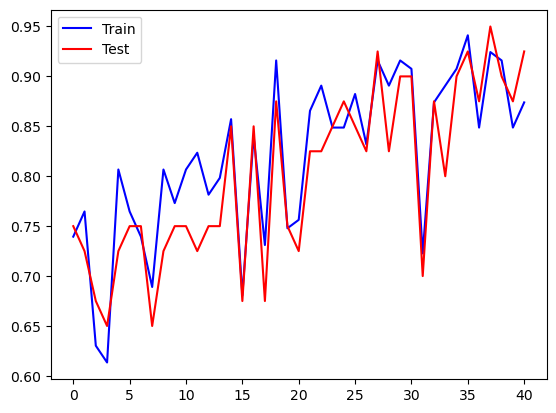

In [11]:
# 시각화
import matplotlib.pyplot as plt
plt.plot(train_score, 'b-', label = "Train")
plt.plot(test_score, 'r-', label = "Test")
plt.legend()
plt.show()